---

# Compactified  $\phi^2 + \exp^{\lambda\chi}$  Inflation

### Here $z$ is NON-compact !
---

---
**Author**:      Efrain Torres-Lomas 

**Email**:       ``efrain@fisica.ugto.mx``

**Github**:      https://github.com/elchinot7

**Bitbucket**:   https://bitbucket.org/elchinot7/pyncare

**Date**:        September 2016

---

## Note:
#### Here I will use the ``pyncare`` Python package.

You can get it by doing:

    git clone https://elchinot7@bitbucket.org/elchinot7/pyncare.git

To install:

    python setup.py install
    

## Importing ``pyncare`` and other packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

#from pyncare.models import compact_dyn_sys_phi2
from pyncare.utils import plot_latitude
from pyncare import BaseDynSys

%matplotlib notebook
#%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context("notebook") # paper, notebook, talk, and poster


# The Model:

$$V=\frac{1}{2}m^2\phi^2 + \exp^{-\lambda \chi}$$

## The system:

\begin{eqnarray}
&& x_m^\prime = -3 (1 - x_m^2 - x_e^2) x_m + \frac{1}{2} y_m z  \\
&& x_e^\prime = -3 (1 - x_m^2 - x_e^2) x_e + \frac{\alpha}{2} (1 - x_m^2 - x_e^2 - y_m^2) \\
&& y_m^\prime = 3 (x_m^2 + x_e^2) y_m - \frac{1}{2} x_m z  \\
&& z^\prime = 3 (x_m^2 + x_e^2) z
\end{eqnarray}

In [2]:
def phi2_plus_exp_dynsys(init, t=None, modelpars=[1.0]):
        if t is None:
            t = 1.0  # This is used to allows a call from "plot_vector_flow()"
        xm = init[0]
        xe = init[1]
        ym = init[2]
        z = init[3]
        
        alpha = modelpars[0]

        # the model equations
        A = xm**2.0 + xe**2.0
        xm_dot = -3.0 * (1.0 - A) * xm + ym * z / 2.0
        xe_dot = -3.0 * (1.0 - A) * xe + alpha * (1.0 - A - ym**2.0) / 2.0
        ym_dot = 3.0 * A * ym - xm * z / 2.0
        z_dot =  3.0 * A * z
        return [xm_dot, xe_dot, xe_dot, z_dot]

# Numerical Solution:

- Define the Dynamical System Object
- Solve & Plot the orbits
- Add the constraints plots

**New!** Now is ease to use different predefined color schemes!

Just set

    colors='colorscheme'

where 'colorscheme' is one of 

    [None, 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']


<IPython.core.display.Javascript object>


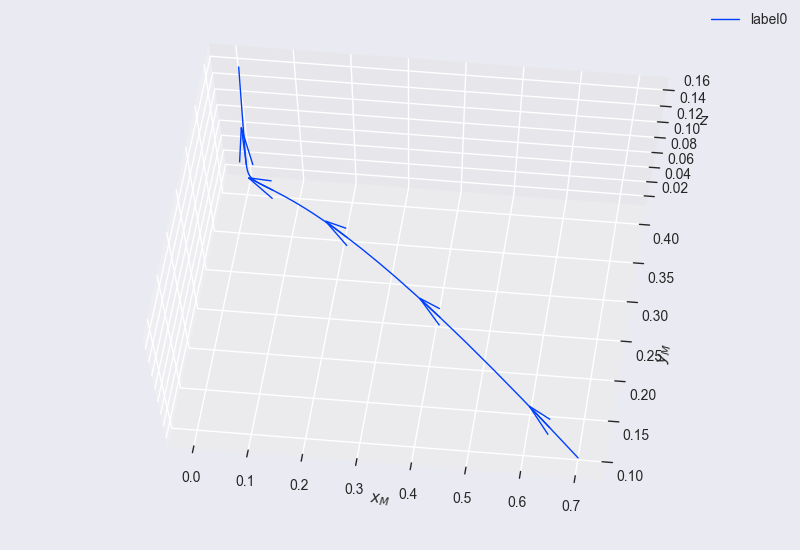

In [9]:
a = 3.0

t = np.linspace(0.0, 5.5, 100)

var_names = {'xm': r'$x_M$', 'xe': r'$x_E$', 'ym': r'$y_M$', 'z': r'$z$'}

arrow_pos = [1, 5, 10, 20, -50]

orbits = [{'vars': OrderedDict([('xm', 0.7), ('xe', 0.1), ('ym', 0.1), ('z', 0.01)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'label0'},
         ]
dynsys = BaseDynSys(model=phi2_plus_exp_dynsys,
                    model_pars=[a],
                    var_names=var_names,
                    Ndim=4,
                    orbits=orbits,
                    lines=None,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111)

dynsys.plot_orbits(ax=ax, vars_to_plot=['xm', 'ym', 'z'], add_flow=True, lw=1)